# Advanced Machine Learning 

In [1]:
# Load library that we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load dataset (iris), split into X_train, y_train, X_test, y_test!
# Write your code here 
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 1. Voting 

In [2]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

# Hint: 
# clf_voting = VotingClassifier( estimators=[('label1', clf_1),
#('label2', clf_2),
#('labelN', clf_N)]) 

# Create the individual models
clf_knn = KNeighborsClassifier(50)
clf_dt = DecisionTreeClassifier(max_depth = 1)
clf_lr = LogisticRegression()

# Create voting classifier
clf_voting = VotingClassifier(estimators = [
('knn', clf_knn),
('dt', clf_dt),
('lr', clf_lr)])

# Fit it to the training set and predict
clf_voting.fit(X_train, y_train)
y_pred = clf_voting.predict(X_test)

# Get the accuracy score
acc_voting = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Voting: {:0.2f}%".format(acc_voting*100))

D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy Voting: 95.56%


In [3]:
# Let us compare the accuracy of each base models!

# K-NN (k = 50)
clf_knn.fit(X_train, y_train)
y_pred = clf_knn.predict(X_test)
acc_knn = metrics.accuracy_score(y_test, y_pred)
print("Accuracy K-Nearest Neighbour: {:0.2f}%".format(acc_knn*100))

# Decision Tree
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Decision Tree: {:0.2f}%".format(acc_dt*100))

# Logistic Regression
clf_lr.fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)
acc_lr = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Logistic Regression: {:0.2f}%".format(acc_lr*100))

Accuracy K-Nearest Neighbour: 95.56%
Accuracy Decision Tree: 71.11%
Accuracy Logistic Regression: 97.78%


D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 2. Averaging 

In [4]:
# Template for averaging Classifier 

from sklearn.ensemble import VotingClassifier
                       
# clf_voting = VotingClassifier(
# estimators=[
#('label1', clf_1),
#('label2', clf_2),
#...
#('labelN', clf_N)],
#voting='soft',
#weights=[w_1, w_2, ..., w_N]
#)

clf_avg = VotingClassifier(estimators = [
('knn', clf_knn),
('dt', clf_dt),
('lr', clf_lr)],
voting = 'soft')

# Fit it to the training set and predict
clf_avg.fit(X_train, y_train)
y_pred = clf_avg.predict(X_test)

# Get the accuracy score
acc_avg = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Averaging: {:0.2f}%".format(acc_avg*100))

Accuracy Averaging: 100.00%


D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
# Initiate the individual models 

# Write your code here! 

# Create averaging classifier

# Write your code here! 

## 3. Bagging

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

cancer = datasets.load_breast_cancer()

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

clf_bagging = BaggingClassifier(KNeighborsClassifier(), max_samples = 0.5, max_features = 0.5)

# Fit it to the training set and predict
clf_bagging.fit(X_train, y_train)
y_pred = clf_bagging.predict(X_test)

# Get the accuracy score
acc_bagging = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Bagging with K-Neighbour: {:0.2f}%".format(acc_bagging*100))

Accuracy Bagging with K-Neighbour: 95.91%


In [16]:
# Write your code here if base classifier = decision tree!
from sklearn.tree import DecisionTreeClassifier

clf_bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples = 0.5, max_features = 0.5)

# Fit it to the training set and predict
clf_bagging.fit(X_train, y_train)
y_pred = clf_bagging.predict(X_test)

# Get the accuracy score
acc_bagging = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Bagging with Decision Tree: {:0.2f}%".format(acc_bagging*100))

Accuracy Bagging with Decision Tree: 96.49%


In [17]:
# Write your code here if you use RandomForest, compare with above!
from sklearn.ensemble import RandomForestClassifier

clf_bagging = BaggingClassifier(RandomForestClassifier(), max_samples = 0.5, max_features = 0.5)

# Fit it to the training set and predict
clf_bagging.fit(X_train, y_train)
y_pred = clf_bagging.predict(X_test)

# Get the accuracy score
acc_bagging = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Bagging with Random Forest: {:0.2f}%".format(acc_bagging*100))

Accuracy Bagging with Random Forest: 95.91%


D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change 

## 4. Boosting
Source: https://scikit-learn.org/stable/modules/ensemble.html

In [39]:
from sklearn.ensemble import AdaBoostClassifier
# clf_ada = AdaBoostClassifier(
# base_estimator,
# n_estimators,
# learning_rate
# )

# base_estimator
# Default: Decision Tree (max_depth=1)
# n_estimators
# Default: 50
# learning_rate
# Default: 1.0
# Trade-off between n_estimators and
# learning_rate
clf_ada = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 100, learning_rate = 1.0)
clf_ada.fit(X_train, y_train)
y_pred = clf_ada.predict(X_test)

In [40]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label') 

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [42]:
cname = cancer.target_names

Confusion matrix, without normalization
[[ 62   1]
 [  2 106]]


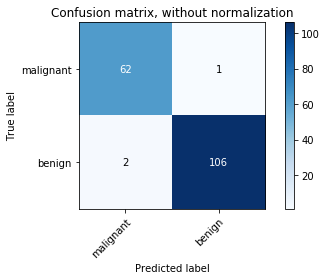

In [43]:
plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

### Create AdaBoost Classifier for iris dataset!

In [ ]:
# Write your code here!

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# reg_ada = AdaBoostRegressor(
# base_estimator,
# n_estimators,
# learning_rate,
# loss
# )

# base_estimator
# Default: Decision Tree (max_depth=3)
# loss
# linear (default)
# square
# exponential

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train, y_train)
y_pred = clf_gbc.predict(X_test)

Confusion matrix, without normalization
[[ 59   4]
 [  3 105]]


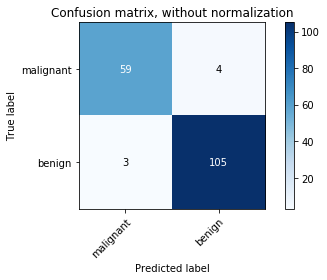

In [45]:
plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

### Create GradientBoostingClassifier for iris Dataset!

In [5]:
# Write your code here!

In [50]:
# import xgboost as xgb => ini mesti install dulu 
# import lightgbm as lgb
# import catboost as cb
# Cek di sini: 
# https://stackoverflow.com/questions/35139108/how-to-install-xgboost-in-anaconda-python-windows-platform

import xgboost as xgb
import lightgbm as lgb
import catboost as cb

### Create XGBoost, lightgbm, catboost for iris Dataset

In [51]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

Confusion matrix, without normalization
[[ 59   4]
 [  2 106]]


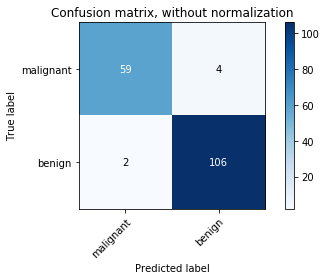

In [52]:
plot_confusion_matrix(y_test, y_pred, cname)

In [54]:
# Get the accuracy score
acc_xgb = metrics.accuracy_score(y_test, y_pred)
print("Accuracy XGBoost: {:0.2f}%".format(acc_xgb*100))

Accuracy XGBoost: 96.49%


## 5. Stacking  

In [ ]:
# from mlxtend.classifier import StackingClassifier => ini mesti install dulu 

In [ ]:
# Instantiate the 1st-layer classifiers
# clf1 = Classifier1(params1)
# clf2 = Classifier2(params2)
# ...
# clfN = ClassifierN(paramsN)

# Instantiate the 2nd-layer classifier
# clf_meta = ClassifierMeta(paramsMeta)

# Build the Stacking classifier
# clf_stack = StackingClassifier(
# classifiers=[clf1, clf2, ... clfN],
# meta_classifier=clf_meta,
# use_probas=False,
# use_features_in_secondary=False)

# Use the fit and predict methods
# like with scikit-learn estimators
# clf_stack.fit(X_train, y_train)
# pred = clf_stack.predict(X_test)

In [57]:
from mlxtend.classifier import StackingClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

clf_stack1 = lgb.LGBMClassifier(learning_rate = 0.1)
clf_stack2 = cb.CatBoostClassifier(learning_rate = 0.1)
clf_stack3 = xgb.XGBClassifier(learning_rate = 0.1)
lr = LogisticRegression()

clf_stack = StackingClassifier(classifiers = [clf_stack1, clf_stack2, clf_stack3], meta_classifier = lr)
clf_stack.fit(X_train, y_train)
y_pred = clf_stack.predict(X_test)

0:	learn: 0.5483316	total: 143ms	remaining: 2m 22s
1:	learn: 0.4410834	total: 154ms	remaining: 1m 16s
2:	learn: 0.3652964	total: 164ms	remaining: 54.5s
3:	learn: 0.3017461	total: 174ms	remaining: 43.3s
4:	learn: 0.2601620	total: 184ms	remaining: 36.7s
5:	learn: 0.2294997	total: 196ms	remaining: 32.5s
6:	learn: 0.1973244	total: 206ms	remaining: 29.3s
7:	learn: 0.1716186	total: 219ms	remaining: 27.1s
8:	learn: 0.1494674	total: 231ms	remaining: 25.4s
9:	learn: 0.1385052	total: 240ms	remaining: 23.8s
10:	learn: 0.1245621	total: 250ms	remaining: 22.4s
11:	learn: 0.1121033	total: 259ms	remaining: 21.3s
12:	learn: 0.1022647	total: 268ms	remaining: 20.4s
13:	learn: 0.0922438	total: 277ms	remaining: 19.5s
14:	learn: 0.0841177	total: 288ms	remaining: 18.9s
15:	learn: 0.0783853	total: 299ms	remaining: 18.4s
16:	learn: 0.0715867	total: 310ms	remaining: 17.9s
17:	learn: 0.0676322	total: 323ms	remaining: 17.6s
18:	learn: 0.0624413	total: 335ms	remaining: 17.3s
19:	learn: 0.0578093	total: 348ms	remai

163:	learn: 0.0035750	total: 1.97s	remaining: 10s
164:	learn: 0.0035710	total: 1.98s	remaining: 10s
165:	learn: 0.0035298	total: 2s	remaining: 10.1s
166:	learn: 0.0035266	total: 2.02s	remaining: 10.1s
167:	learn: 0.0035099	total: 2.03s	remaining: 10s
168:	learn: 0.0034898	total: 2.04s	remaining: 10s
169:	learn: 0.0034834	total: 2.05s	remaining: 9.99s
170:	learn: 0.0034461	total: 2.06s	remaining: 9.97s
171:	learn: 0.0034144	total: 2.06s	remaining: 9.94s
172:	learn: 0.0033587	total: 2.07s	remaining: 9.92s
173:	learn: 0.0033308	total: 2.08s	remaining: 9.89s
174:	learn: 0.0033154	total: 2.09s	remaining: 9.87s
175:	learn: 0.0033019	total: 2.1s	remaining: 9.84s
176:	learn: 0.0032492	total: 2.11s	remaining: 9.81s
177:	learn: 0.0032158	total: 2.12s	remaining: 9.79s
178:	learn: 0.0032131	total: 2.13s	remaining: 9.76s
179:	learn: 0.0031766	total: 2.14s	remaining: 9.74s
180:	learn: 0.0031747	total: 2.15s	remaining: 9.72s
181:	learn: 0.0031661	total: 2.16s	remaining: 9.7s
182:	learn: 0.0031643	tot

328:	learn: 0.0020992	total: 3.54s	remaining: 7.22s
329:	learn: 0.0020982	total: 3.55s	remaining: 7.21s
330:	learn: 0.0020918	total: 3.56s	remaining: 7.2s
331:	learn: 0.0020743	total: 3.58s	remaining: 7.19s
332:	learn: 0.0020734	total: 3.59s	remaining: 7.19s
333:	learn: 0.0020726	total: 3.6s	remaining: 7.17s
334:	learn: 0.0020550	total: 3.61s	remaining: 7.16s
335:	learn: 0.0020445	total: 3.62s	remaining: 7.15s
336:	learn: 0.0020304	total: 3.63s	remaining: 7.13s
337:	learn: 0.0020204	total: 3.64s	remaining: 7.12s
338:	learn: 0.0020197	total: 3.65s	remaining: 7.11s
339:	learn: 0.0020174	total: 3.66s	remaining: 7.1s
340:	learn: 0.0020163	total: 3.67s	remaining: 7.09s
341:	learn: 0.0020141	total: 3.68s	remaining: 7.08s
342:	learn: 0.0019992	total: 3.69s	remaining: 7.07s
343:	learn: 0.0019985	total: 3.7s	remaining: 7.06s
344:	learn: 0.0019979	total: 3.71s	remaining: 7.05s
345:	learn: 0.0019942	total: 3.73s	remaining: 7.05s
346:	learn: 0.0019936	total: 3.75s	remaining: 7.05s
347:	learn: 0.00

503:	learn: 0.0013594	total: 5.25s	remaining: 5.17s
504:	learn: 0.0013591	total: 5.26s	remaining: 5.16s
505:	learn: 0.0013589	total: 5.27s	remaining: 5.14s
506:	learn: 0.0013537	total: 5.28s	remaining: 5.13s
507:	learn: 0.0013471	total: 5.29s	remaining: 5.12s
508:	learn: 0.0013469	total: 5.29s	remaining: 5.11s
509:	learn: 0.0013410	total: 5.3s	remaining: 5.1s
510:	learn: 0.0013314	total: 5.31s	remaining: 5.08s
511:	learn: 0.0013254	total: 5.32s	remaining: 5.07s
512:	learn: 0.0013200	total: 5.33s	remaining: 5.06s
513:	learn: 0.0013133	total: 5.34s	remaining: 5.05s
514:	learn: 0.0013118	total: 5.35s	remaining: 5.04s
515:	learn: 0.0013061	total: 5.36s	remaining: 5.03s
516:	learn: 0.0013014	total: 5.37s	remaining: 5.01s
517:	learn: 0.0012939	total: 5.38s	remaining: 5s
518:	learn: 0.0012848	total: 5.39s	remaining: 4.99s
519:	learn: 0.0012806	total: 5.39s	remaining: 4.98s
520:	learn: 0.0012743	total: 5.4s	remaining: 4.97s
521:	learn: 0.0012689	total: 5.41s	remaining: 4.95s
522:	learn: 0.0012

668:	learn: 0.0008179	total: 6.67s	remaining: 3.3s
669:	learn: 0.0008147	total: 6.68s	remaining: 3.29s
670:	learn: 0.0008145	total: 6.69s	remaining: 3.28s
671:	learn: 0.0008123	total: 6.7s	remaining: 3.27s
672:	learn: 0.0008097	total: 6.71s	remaining: 3.26s
673:	learn: 0.0008062	total: 6.72s	remaining: 3.25s
674:	learn: 0.0008028	total: 6.73s	remaining: 3.24s
675:	learn: 0.0008027	total: 6.74s	remaining: 3.23s
676:	learn: 0.0008025	total: 6.75s	remaining: 3.22s
677:	learn: 0.0007996	total: 6.75s	remaining: 3.21s
678:	learn: 0.0007975	total: 6.76s	remaining: 3.2s
679:	learn: 0.0007955	total: 6.77s	remaining: 3.19s
680:	learn: 0.0007954	total: 6.78s	remaining: 3.18s
681:	learn: 0.0007953	total: 6.79s	remaining: 3.17s
682:	learn: 0.0007938	total: 6.8s	remaining: 3.15s
683:	learn: 0.0007913	total: 6.8s	remaining: 3.14s
684:	learn: 0.0007900	total: 6.81s	remaining: 3.13s
685:	learn: 0.0007868	total: 6.82s	remaining: 3.12s
686:	learn: 0.0007867	total: 6.83s	remaining: 3.11s
687:	learn: 0.000

835:	learn: 0.0005920	total: 8.09s	remaining: 1.59s
836:	learn: 0.0005912	total: 8.1s	remaining: 1.58s
837:	learn: 0.0005902	total: 8.11s	remaining: 1.57s
838:	learn: 0.0005888	total: 8.12s	remaining: 1.56s
839:	learn: 0.0005874	total: 8.13s	remaining: 1.55s
840:	learn: 0.0005858	total: 8.14s	remaining: 1.54s
841:	learn: 0.0005850	total: 8.15s	remaining: 1.53s
842:	learn: 0.0005826	total: 8.15s	remaining: 1.52s
843:	learn: 0.0005813	total: 8.16s	remaining: 1.51s
844:	learn: 0.0005805	total: 8.17s	remaining: 1.5s
845:	learn: 0.0005795	total: 8.18s	remaining: 1.49s
846:	learn: 0.0005782	total: 8.19s	remaining: 1.48s
847:	learn: 0.0005775	total: 8.2s	remaining: 1.47s
848:	learn: 0.0005764	total: 8.21s	remaining: 1.46s
849:	learn: 0.0005755	total: 8.21s	remaining: 1.45s
850:	learn: 0.0005748	total: 8.22s	remaining: 1.44s
851:	learn: 0.0005747	total: 8.23s	remaining: 1.43s
852:	learn: 0.0005742	total: 8.24s	remaining: 1.42s
853:	learn: 0.0005735	total: 8.25s	remaining: 1.41s
854:	learn: 0.0

D:\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix, without normalization
[[ 60   3]
 [  2 106]]


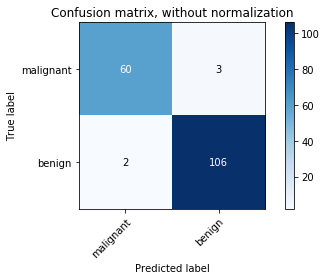

In [60]:
plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

In [61]:
# Get the accuracy score
acc_stack = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Stack Classifier: {:0.2f}%".format(acc_stack*100))

Accuracy Stack Classifier: 97.08%
